In [1]:
# importation des bibliiotheques necessaires
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
#lire le fichier et le mettre dans une data set
dataset=pd.read_csv("card_transdata.csv", sep=",").copy()

In [42]:
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
151203,3.724429,0.428523,0.772360,1.0,1.0,0.0,1.0,0.0
151204,5.794635,0.399975,4.622092,1.0,1.0,0.0,1.0,1.0
151205,19.814150,0.234146,14.211268,1.0,1.0,0.0,1.0,1.0
151206,1.418383,5.712756,0.298518,0.0,0.0,0.0,1.0,0.0


In [43]:
#rendre en dataframe
dataframe = pd.DataFrame(dataset)

In [44]:
dataframe.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [45]:
dataframe.tail(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
151207,28.720094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#voir le nombre des elements nulles
dataframe.isnull().sum()

distance_from_home                0
distance_from_last_transaction    1
ratio_to_median_purchase_price    1
repeat_retailer                   1
used_chip                         1
used_pin_number                   1
online_order                      1
fraud                             1
dtype: int64

In [47]:
#j'ai remarquer que seul la derniere row est NaN donc jl'ai effacé
dataframe = dataframe.dropna()

In [48]:
#s'assurer qu'il ne reste pas des elements nulls
dataframe.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [49]:
dataframe['fraud'           ] =dataframe['fraud'          ].astype(int)
dataframe['online_order'    ] =dataframe['online_order'   ].astype(int)
dataframe['used_pin_number' ] =dataframe['used_pin_number'].astype(int)
dataframe['used_chip'       ] =dataframe['used_chip'      ].astype(int)
dataframe['repeat_retailer' ] =dataframe['repeat_retailer'].astype(int)

In [50]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

In [51]:
normalized_df
#i prefer to use unnormalized data frame

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.012575,0.000144,0.007280,1.0,1.0,0.0,0.0,0.0
1,0.002349,0.000081,0.004836,1.0,0.0,0.0,0.0,0.0
2,0.001102,0.000372,0.001587,1.0,0.0,0.0,1.0,0.0
3,0.000484,0.002592,0.001343,1.0,1.0,0.0,1.0,0.0
4,0.009600,0.000262,0.008318,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
151202,0.000055,0.004650,0.008753,0.0,0.0,0.0,1.0,0.0
151203,0.000805,0.000198,0.002880,1.0,1.0,0.0,1.0,0.0
151204,0.001255,0.000185,0.017315,1.0,1.0,0.0,1.0,1.0
151205,0.004302,0.000108,0.053272,1.0,1.0,0.0,1.0,1.0


In [52]:
#s'assurer
missing_values = dataframe.isnull().sum().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


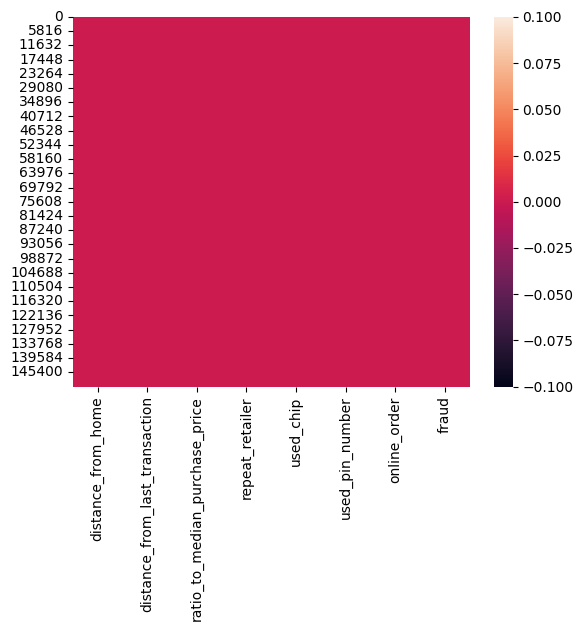

In [53]:
#une figure qui montre les elements nulls
sns.heatmap(dataframe.isnull(), cbar=True)
plt.show()

In [54]:
#s'assurer que tous les colonnes contiennent le même type
print("Data Types:\n",dataframe.dtypes)

Data Types:
 distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object


In [55]:
#voir si y on a des doublés
duplicated =dataframe[dataframe.duplicated()]
print("Duplicate Rows: ",duplicated)

Duplicate Rows:  Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []


In [56]:
# Check for outliers
print(dataframe.describe())

       distance_from_home  distance_from_last_transaction  \
count       151207.000000                   151207.000000   
mean            26.643721                        5.003889   
std             64.126445                       23.792896   
min              0.021322                        0.000419   
25%              3.836230                        0.293954   
50%              9.935228                        0.998659   
75%             25.688863                        3.344503   
max           4601.011222                     2160.499922   

       ratio_to_median_purchase_price  repeat_retailer      used_chip  \
count                   151207.000000    151207.000000  151207.000000   
mean                         1.815999         0.881057       0.350328   
std                          2.839988         0.323722       0.477074   
min                          0.004399         0.000000       0.000000   
25%                          0.475497         1.000000       0.000000   
50%         

In [57]:
dataframe = dataframe[(dataframe['distance_from_home'] > 0)]

In [58]:
dataframe = dataframe[(dataframe['distance_from_last_transaction'] > 0)]

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



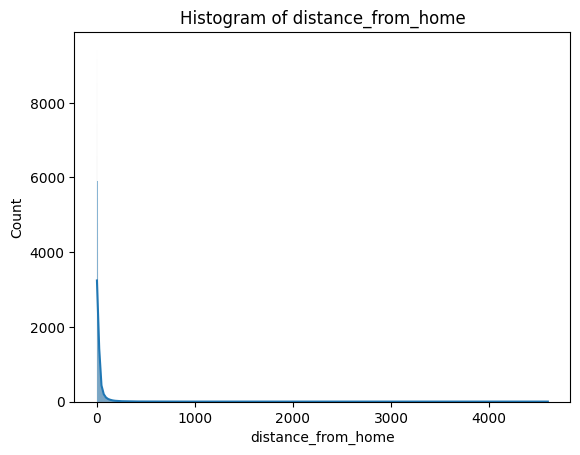

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



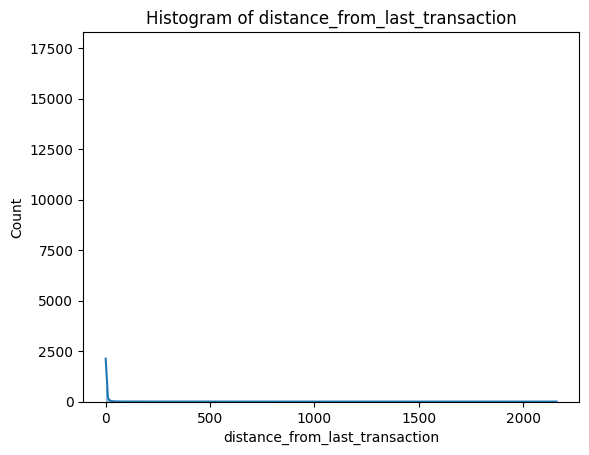

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



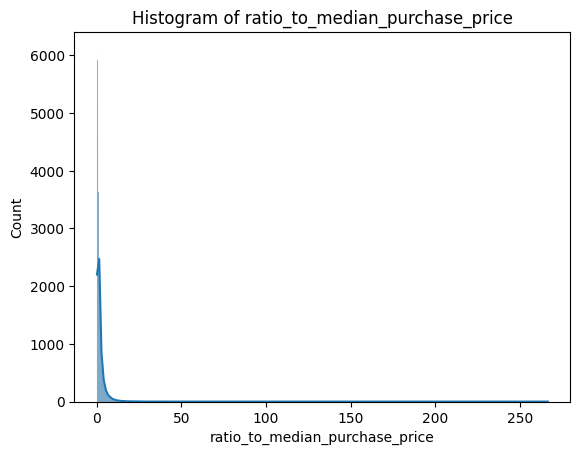

In [59]:
toPlot =['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']
for column in toPlot:
    sns.histplot(data=dataframe[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [60]:
dataframe.to_csv('cleaned_dataset.csv', index=False)
print("Data processing complete cleaned dataset saved as 'cleaned_dataset.csv'")

Data processing complete cleaned dataset saved as 'cleaned_dataset.csv'


In [61]:
dataframe.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,1.94594,1,1,0,0,0


In [62]:
#how the distance from a previous transaction relates to the distance from home
trace = go.Scatter(x=dataframe['distance_from_last_transaction'], y=dataframe['distance_from_home'], mode='markers', marker=dict(color=dataframe['distance_from_last_transaction']))
data = [trace]
layout = go.Layout(title='realtion between',xaxis=dict(title='distance_from_last_transaction'),yaxis=dict(title='distance_from_home'))

In [63]:
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig , filename='relation_plot.html')
#resultat s'affiche dans un fichier html

'relation_plot.html'

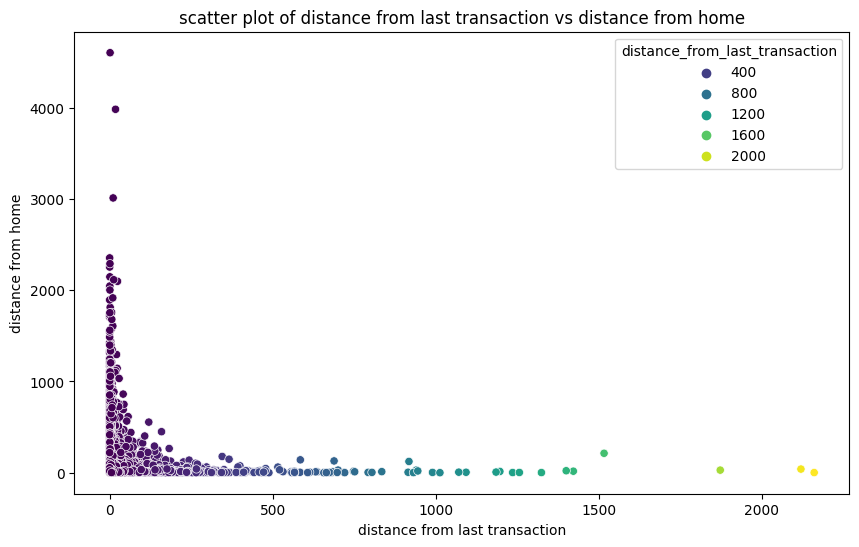

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_last_transaction', y='distance_from_home', data=dataframe, hue='distance_from_last_transaction', palette='viridis')
plt.title('scatter plot of distance from last transaction vs distance from home')
plt.xlabel('distance from last transaction')
plt.ylabel('distance from home')
plt.show()

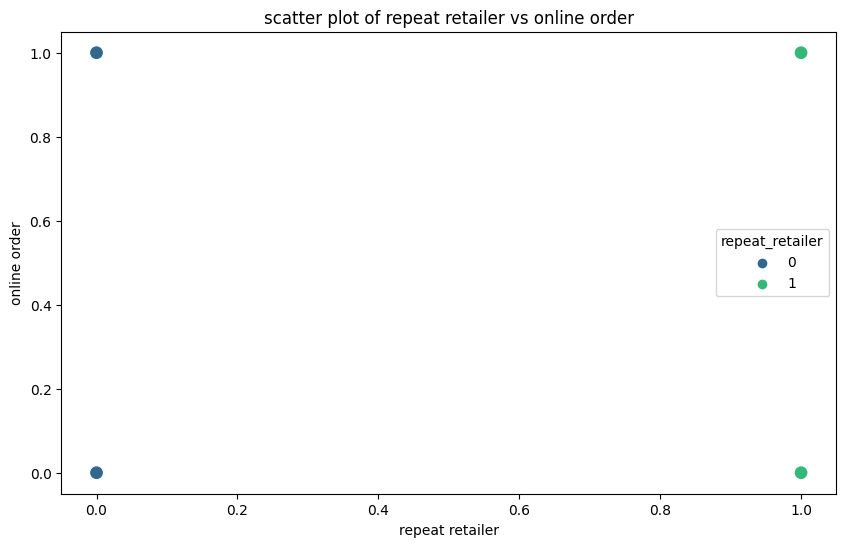

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='repeat_retailer', y='online_order', data=dataframe, hue='repeat_retailer', palette='viridis', s=100)
plt.title('scatter plot of repeat retailer vs online order')
plt.xlabel('repeat retailer')
plt.ylabel('online order')
plt.show()

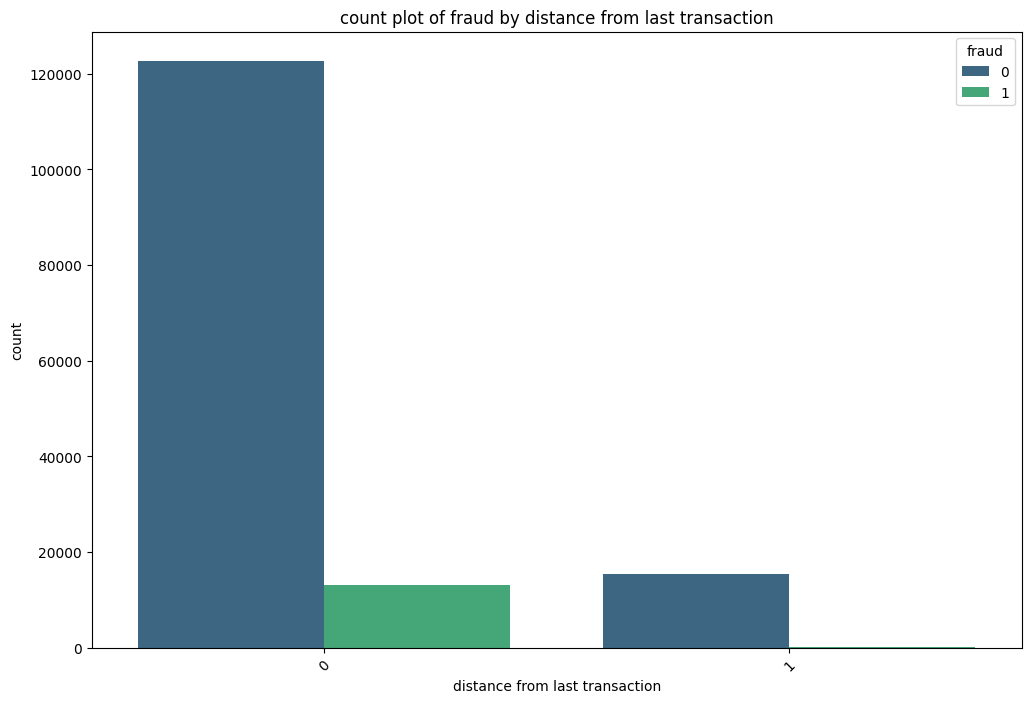

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(x='used_pin_number', hue='fraud', data=dataframe, palette='viridis')
plt.title('count plot of fraud by distance from last transaction')
plt.xlabel('distance from last transaction')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [67]:
x = dataframe.drop(["distance_from_home", "distance_from_last_transaction" ,"ratio_to_median_purchase_price" , "repeat_retailer"], axis=1)
y= dataframe["fraud"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

In [68]:
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [69]:
y_pred = model.predict(x_test)
y_pred

array([-1.38754549e-15,  2.09742019e-15,  1.00000000e+00, ...,
        1.00000000e+00, -5.52778560e-17,  1.58417533e-15])

In [70]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [71]:
print("MSE:", mse)
print("R² Score:", r2)

MSE: 1.4238973488088446e-29
R² Score: 1.0


In [72]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

In [73]:
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
b = model_poly.predict(X_poly_test)
b

array([ 2.92959085e-16, -1.33293093e-15,  1.00000000e+00, ...,
        1.00000000e+00,  2.44251919e-16, -1.21832058e-15])

In [75]:
mse = mean_squared_error(y_test,b)
r2 = r2_score(y_test,b)

In [76]:
print("MSE:", mse)
print("R² Score:", r2)

MSE: 6.608350673773928e-30
R² Score: 1.0


In [77]:
#accuracy = accuracy_score(y_test, b)
#print("Accuracy:", accuracy)

In [78]:
x = dataframe[["distance_from_home", "distance_from_last_transaction"]]
y = dataframe["fraud"]

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [80]:
y_pred  = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [82]:
print("MSE:     ", mse)
print("R² Score:", r2)

MSE:      0.08856674250039681
R² Score: -0.10432561715177369


In [83]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

In [84]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9114332574996032
Precision: 0.43333333333333335
Recall: 0.023465703971119134
F1 Score: 0.04452054794520548


In [85]:
scores =cross_val_score(logreg,x_train,y_train,cv=5,scoring='accuracy')
print("Cross vald acc score:",scores)
print("Mean                :",scores.mean())

Cross vald acc score: [0.91336361 0.91358406 0.91287862 0.91217318 0.91309907]
Mean                : 0.9130197081257438


In [86]:
y_cv_pred = cross_val_predict(logreg, x_train, y_train, cv=5)

In [87]:
y_scores =cross_val_predict(logreg,x_train,y_train,cv=5,method="predict_proba")
fpr,tpr,thresholds =roc_curve(y_train,y_scores[:,1])
roc_auc =auc(fpr, tpr)

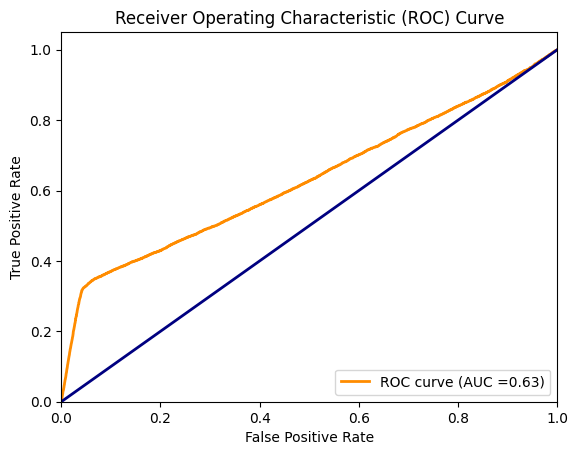

In [88]:
#ROC
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC ={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy', lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [90]:
# Load the model from the file
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [91]:
# Make predictions
predictions = logreg.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 0]
